# Setup paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            get_ipython().system('mkdir -p {path}')
        if os.name == 'nt':
            get_ipython().system('mkdir {path}')

# Download Tensorflow models from Tensorflow Zoo Model and install Tensorflow Object Detection

In [6]:
# clone tensorflow models from Github
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    get_ipython().system("git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}")

In [7]:
# install Tensorflow Object Detection 
if os.name=='posix':  
    get_ipython().system('apt-get install protobuf-compiler')
    get_ipython().system('cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .')
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    get_ipython().system("move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}")
    get_ipython().system("cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip")
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    get_ipython().system('cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\\\packages\\\\tf2\\\\setup.py setup.py && python setup.py build && python setup.py install')
    get_ipython().system('cd Tensorflow/models/research/slim && pip install -e .')

zsh:1: command not found: apt-get
DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/pyasn1_modules-0.3.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Processing /Users/alirezabj/Desktop/DSS-Second year/computer vision 1/Computer Vision Project/Tensorflow/models/research
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for tensorflow~=2.15.0 from https://files.pythonhosted.org/packages/25/72/2ede9c4b9b96650a8a7b909abf4733adf110c5907425ee252f8095385b11/tensorflow-2.15.1-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.15.1-cp311-cp311-macosx_10_15_x86_64.whl.metadata (4.0 kB)


  Obtaining dependency information for tensorboard<2.16,>=2.15 from https://files.pythonhosted.org/packages/37/12/f6e9b9dcc310263cbd3948274e286538bd6800fd0c268850788f14a0c6d0/tensorboard-2.15.2-py3-none-any.whl.metadata
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependency information for tensorflow-estimator<2.16,>=2.15.0 from https://files.pythonhosted.org/packages/b6/c8/2f823c8958d5342eafc6dd3e922f0cc4fcf8c2e0460284cc462dae3b60a0/tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/fc/a7/0d4490de967a67f68a538cc9cdb259bff971c4b5787f7765dc7c8f118f71/keras-2.15.0-py3-none-any.whl.metadata
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)


  Obtaining dependency information for protobuf!=4.0.*,!=4.21.*,!=4.22.0,!=4.23.*,!=4.24.*,<4.26.0,>=3.20.3 from https://files.pythonhosted.org/packages/8d/14/619e24a4c70df2901e1f4dbc50a6291eb63a759172558df326347dce1f0d/protobuf-3.20.3-py2.py3-none-any.whl.metadata
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached tensorflow-2.15.1-cp311-cp311-macosx_10_15_x86_64.whl (236.5 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1655483 sha256=8e097bc0b98644e8a76acd8527fefcbad994c247e6185b709345ec3f4fd87665
  Stored in directory: /private/var/folders/7k/38vhyhtd7j3_f52d8g_s38rw0000gn/T/pip-ephem-wheel-cache-g_3turb3/wheels/c7/24/dd/a179a4b42e864ac0945f5a99d682e345f253995f467612

In [8]:
# verify installation of Tensorflow
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
get_ipython().system('python {VERIFICATION_SCRIPT}')

2024-03-14 11:24:49.047362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Running tests under Python 3.11.5: /Users/alirezabj/anaconda3/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0314 11:25:02.959629 140704313558976 batch_normalization.py:1531] `tf.keras.layers.experimental.SyncBatchNormalization` endpoint is deprecated and will be removed in a future release. Please use `tf.keras.layers.BatchNormalization` with parameter `synchronized` set to True.
/Users/alirezabj/anaconda3/lib/python3.11/site-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0314 11:25:03

I0314 11:25:08.964620 140704313558976 efficientnet_model.py:143] round_filter input=16 output=16
I0314 11:25:08.964766 140704313558976 efficientnet_model.py:143] round_filter input=24 output=24
I0314 11:25:09.260356 140704313558976 efficientnet_model.py:143] round_filter input=24 output=24
I0314 11:25:09.260471 140704313558976 efficientnet_model.py:143] round_filter input=40 output=40
I0314 11:25:09.601536 140704313558976 efficientnet_model.py:143] round_filter input=40 output=40
I0314 11:25:09.601669 140704313558976 efficientnet_model.py:143] round_filter input=80 output=80
I0314 11:25:10.018545 140704313558976 efficientnet_model.py:143] round_filter input=80 output=80
I0314 11:25:10.018676 140704313558976 efficientnet_model.py:143] round_filter input=112 output=112
I0314 11:25:10.601823 140704313558976 efficientnet_model.py:143] round_filter input=112 output=112
I0314 11:25:10.601952 140704313558976 efficientnet_model.py:143] round_filter input=192 output=192
I0314 11:25:11.105926 14

I0314 11:25:16.949183 140704313558976 efficientnet_model.py:143] round_filter input=112 output=120
I0314 11:25:16.949307 140704313558976 efficientnet_model.py:143] round_filter input=192 output=208
I0314 11:25:17.814651 140704313558976 efficientnet_model.py:143] round_filter input=192 output=208
I0314 11:25:17.814749 140704313558976 efficientnet_model.py:143] round_filter input=320 output=352
I0314 11:25:18.153276 140704313558976 efficientnet_model.py:143] round_filter input=1280 output=1408
I0314 11:25:18.224807 140704313558976 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I0314 11:25:28.002618 140704313558976 ssd_efficientnet_bifpn_feature_extractor.py:161] EfficientDet EfficientNet backbone version: efficientnet-b5
I0314 11:25:28.002727 140704313558976 ssd_efficientnet_bifpn_feature_extractor.py:163] EfficientDet BiFPN num filters: 288
I0314 11:25:28.002764 140704313558976 ssd_efficientnet_bifpn_feature_extractor.py:164] EfficientDet BiFPN num iterations: 7
I0314 11:25:28.004992 140704313558976 efficientnet_model.py:143] round_filter input=32 output=48
I0314 11:25:28.031404 140704313558976 efficientnet_model.py:143] round_filter input=32 output=48
I0314 11:25:28.031522 140704313558976 efficientnet_model.py:143] round_filter input=16 output=24
I0314 11:25:28.313142 140704313558976 efficientnet_model.py:143] round_filter input=16 output=24
I0314 11:25:28.313236 140704313558976 efficientnet_model.py:143] round_filter input=24 output=40
I0314 11:25:28.928705 140704313558976 efficientnet_model.py:143] round_filter input=24 output=40
I0314 11:25:28.928835 14

I0314 11:25:41.413061 140704313558976 efficientnet_model.py:143] round_filter input=16 output=32
I0314 11:25:41.413187 140704313558976 efficientnet_model.py:143] round_filter input=24 output=48
I0314 11:25:42.660168 140704313558976 efficientnet_model.py:143] round_filter input=24 output=48
I0314 11:25:42.660313 140704313558976 efficientnet_model.py:143] round_filter input=40 output=80
I0314 11:25:43.720619 140704313558976 efficientnet_model.py:143] round_filter input=40 output=80
I0314 11:25:43.720799 140704313558976 efficientnet_model.py:143] round_filter input=80 output=160
I0314 11:25:45.271522 140704313558976 efficientnet_model.py:143] round_filter input=80 output=160
I0314 11:25:45.271616 140704313558976 efficientnet_model.py:143] round_filter input=112 output=224
I0314 11:25:46.849108 140704313558976 efficientnet_model.py:143] round_filter input=112 output=224
I0314 11:25:46.849202 140704313558976 efficientnet_model.py:143] round_filter input=192 output=384
I0314 11:25:49.483988 

# Install other libraries

In [9]:
get_ipython().system('pip uninstall protobuf matplotlib -y')
get_ipython().system('pip install protobuf matplotlib==3.2')

Found existing installation: protobuf 3.20.3
Uninstalling protobuf-3.20.3:
  Successfully uninstalled protobuf-3.20.3
Found existing installation: matplotlib 3.2.0
Uninstalling matplotlib-3.2.0:
  Successfully uninstalled matplotlib-3.2.0
DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/pyasn1_modules-0.3.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/7d/98/282bfe05071c9e1e7e4af692bc937e12e7adacf3b297e0274579de01c9d7/protobuf-5.26.0-cp37-abi3-macosx_10_9_universal2.whl.metadata
  Using cached protobuf-5.26.0-cp37-abi3-macosx_10_9_univer

In [10]:
get_ipython().system('pip install tensorflow==2.13.0')

DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/pyasn1_modules-0.3.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Obtaining dependency information for tensorflow==2.13.0 from https://files.pythonhosted.org/packages/86/a3/a6ffba31621a402d12b137e656814c7b8de2f796fa976acbe92f4602ebad/tensorflow-2.13.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata (3.2 kB)
  Obtaining dependency information for protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 from https://files.pythonhosted.org/packages/f3/bf/26deba06a4c910a85f78245cac769

Using cached tensorflow-2.13.0-cp311-cp311-macosx_10_15_x86_64.whl (216.3 MB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached protobuf-4.25.3-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.26.0
    Uninstalling protobuf-5.26.0:
      Successfully uninstalled protobuf-5.26.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successful

In [11]:
import object_detection

In [12]:
get_ipython().system('pip install wget')

DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/object_detection-0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/alirezabj/anaconda3/lib/python3.11/site-packages/pyasn1_modules-0.3.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [13]:
import wget

# install ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 model from Tensorflow Zoo by cloning it from Github

In [14]:
if os.name =='posix':
    get_ipython().system('wget {PRETRAINED_MODEL_URL}')
    get_ipython().system("mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}")
    get_ipython().system("cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}")
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    get_ipython().system("move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}")
    get_ipython().system("cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}")

--2024-03-14 11:26:54--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.36.59, 142.251.36.27, 172.217.168.219, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.36.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  16,2MB/s    in 1,2s    

2024-03-14 11:26:56 (16,2 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlit

# Create label map

In [15]:
# create label map for images  
labels = [{'name':'Dislike', 'id':1}, {'name':'Hello', 'id':2}, {'name':'Like', 'id':3}, {'name':'ThankYou', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Install Tensorflow Record

In [16]:
# clone tensorflow record from Github
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    get_ipython().system("git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}")

In [17]:
# create Tensorflow records for annotating the images
get_ipython().system("python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')}")
get_ipython().system("python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}")

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# Copy model config to training model

In [18]:
# copy the ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8 default config 
if os.name =='posix':
    get_ipython().system("cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}")
if os.name == 'nt':
    get_ipython().system("copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}")

# Customize config

In [19]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2024-03-14 11:27:39.251391: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# open the config file
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [21]:
# read the config file
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [22]:
# customize the pipline
pipeline_config.model.ssd.num_classes = len(labels)

# set the batch to 4
pipeline_config.train_config.batch_size = 4

# specify the path to the checkpoint file of the pre-trained model
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')

# specify the type of fine-tuning checkpoint to detection 
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"

# set the path to the label map file
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']

# set the path to the TFRecord file containing training data
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]

# set the path to the label map file
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']

# set the path to the TFRecord file containing test data
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [23]:
# write the changes to the pipline config 
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# Train the model

In [24]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')


In [25]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])


In [26]:
get_ipython().system('{command}')

2024-03-14 11:27:59.105557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0314 11:28:07.281172 140704313558976 mirrored_strategy.py:419] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 2000
I0314 11:28:07.301221 140704313558976 config_util.py:552] Maybe overwriting train_steps: 2000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0314 11:28:07.301348 140704313558976 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0314 11:28:07.340407 140704313558976 deprecation.py:364] From /Users

# Evaluate the model

In [27]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [28]:
get_ipython().system('{command}')


2024-03-14 11:28:47.812917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0314 11:28:55.934235 140704313558976 model_lib_v2.py:1089] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0314 11:28:55.934384 140704313558976 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0314 11:28:55.934437 140704313558976 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0314 11:28:55.934487 140704313558976 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0314 11:28:55.934609 140704313558976 model_lib_v2.py:1106] Expected number of evaluation epoc

INFO:tensorflow:Performing evaluation on 12 images.
I0314 11:29:26.209987 140704313558976 coco_evaluation.py:293] Performing evaluation on 12 images.
creating index...
index created!
INFO:tensorflow:Loading and preparing annotation results...
I0314 11:29:26.210530 140704313558976 coco_tools.py:116] Loading and preparing annotation results...
INFO:tensorflow:DONE (t=0.00s)
I0314 11:29:26.211039 140704313558976 coco_tools.py:138] DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.03s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.756
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=10

# Load train model from checkpoint

In [29]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [30]:
# load pipeline config 
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
# build a detection model
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()


@tf.function
def detect_fn(image):
    # preprocess the input image
    image, shapes = detection_model.preprocess(image)
    # make predictions using the preprocessed image
    prediction_dict = detection_model.predict(image, shapes)
    # postprocess the prediction dictionary to obtain the final detections
    detections = detection_model.postprocess(prediction_dict, shapes)
    # return the output value
    return detections

# Detect from an image

In [31]:
# import necessary libraries
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [32]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [34]:
# define the image path
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'like.a12e6738-e169-11ee-8ce5-acde48001122.jpg')

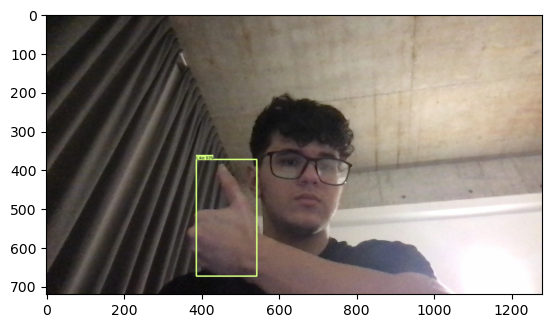

In [35]:
# read the input image
img = cv2.imread(IMAGE_PATH)
# convert the image data to a numpy array
image_np = np.array(img)

# convert the image NumPy array to a TensorFlow tensor and add a batch dimension
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

# call the detect_fn function which was defined earlier and perform object detection on the input image
detections = detect_fn(input_tensor)

# retrieve the number of detections made in the image
num_detections = int(detections.pop('num_detections'))

# iterate over each item in the detections dictionary and then slice the array and convert the sliced array to a numpy array
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
# store the detections
detections['num_detections'] = num_detections

# convert the data type of the detection to np.int64
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1

# create a copy of the original image before drawing the bounding box
image_np_with_detections = image_np.copy()


# visualize the detected objects on the input image
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

# converts the image from BGR to RGB (OpenCV's default color format is in BGR)
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# Real time detection from the webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
# setup the webcam and get the width and height of the frame
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    # convert the image NumPy array to a TensorFlow tensor and add a batch dimension
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    
    # call the detect_fn function which was defined earlier and perform object detection on the input image
    detections = detect_fn(input_tensor)
    
    # retrieve the number of detections made in the image
    num_detections = int(detections.pop('num_detections'))
    
    # iterate over each item in the detections dictionary and then slice the array and convert the sliced array to a numpy array
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    # store the detections
    detections['num_detections'] = num_detections

    # convert the data type of the detection classes to np.int64
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    
    # create a copy of the original image before drawing the bounding box
    image_np_with_detections = image_np.copy()

    # visualize the detected objects on the input image
    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    # display the result 
    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    # quit if the user click os q
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# Extract and zip the model

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}